<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/pp_aut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [2]:
import warnings

warnings.filterwarnings('ignore')

input

In [3]:
df = pd.read_csv("pp_aut.csv")

exploratory

In [4]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        1238 non-null   int64
 1   Problem Solving  1238 non-null   int64
 2   Interaction      1238 non-null   int64
 3   Impact           1238 non-null   int64
 4   Accountability   1238 non-null   int64
dtypes: int64(5)
memory usage: 48.5 KB


In [5]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,75,20,20,30,0
1,75,20,20,30,0
2,75,20,20,30,0
3,75,27,20,30,0
4,75,27,20,30,0


checks

In [6]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,138.215670,47.410339,57.689822,108.278675,24.983037
std,66.448742,20.344478,22.144066,45.621451,19.355472
min,54.000000,20.000000,20.000000,30.000000,0.000000
25%,75.000000,36.000000,36.000000,64.000000,0.000000
50%,120.500000,48.000000,52.000000,116.000000,25.000000
75%,181.000000,65.000000,66.000000,142.000000,40.000000
max,300.000000,117.000000,150.000000,213.000000,75.000000


In [7]:
X=df

Scaling

In [8]:
cols = X.columns

In [9]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [10]:
X = pd.DataFrame(X, columns=[cols])

In [11]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.085366,0.000000,0.0,0.0,0.0
1,0.085366,0.000000,0.0,0.0,0.0
2,0.085366,0.000000,0.0,0.0,0.0
3,0.085366,0.072165,0.0,0.0,0.0
4,0.085366,0.072165,0.0,0.0,0.0


In [12]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.085366,0.000000,0.000000,0.000000,0.000000
1,0.085366,0.000000,0.000000,0.000000,0.000000
2,0.085366,0.000000,0.000000,0.000000,0.000000
3,0.085366,0.072165,0.000000,0.000000,0.000000
4,0.085366,0.072165,0.000000,0.000000,0.000000
...,...,...,...,...,...
1233,0.532520,0.463918,0.353846,0.683060,0.706667
1234,0.857724,0.690722,0.353846,0.841530,0.560000
1235,0.857724,1.000000,0.353846,0.934426,0.800000
1236,0.857724,0.690722,0.353846,0.841530,0.733333


K means

In [13]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [14]:
kmeans.cluster_centers_

array([[0.47508122, 0.44503361, 0.4164583 , 0.65331369, 0.49450605],
       [0.24524419, 0.16375171, 0.19736417, 0.26276128, 0.21504895]])

inertia

In [15]:
kmeans.inertia_

215.81103238625485

Elbow

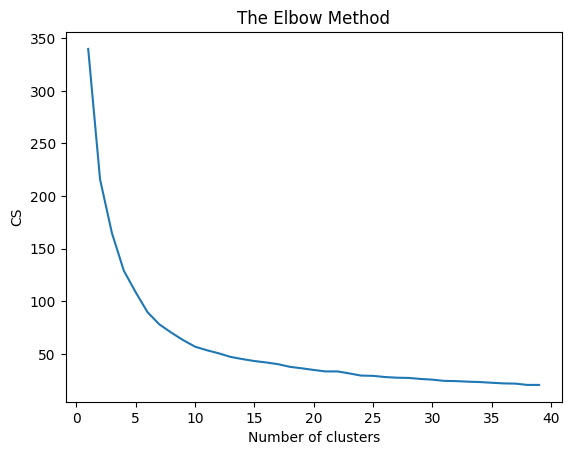

In [16]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

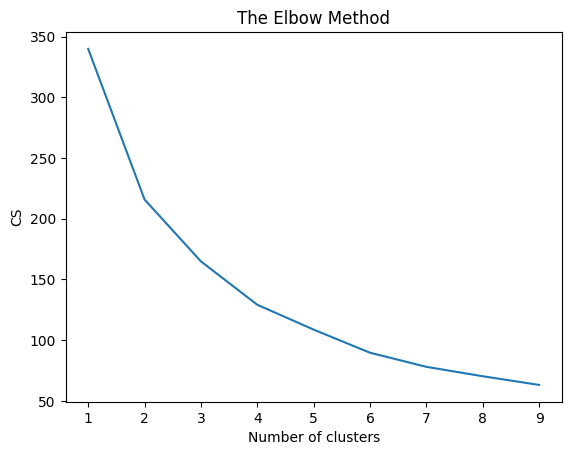

In [17]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=200) 

kmeans.fit(X)

KMeans(n_clusters=4, random_state=200)

In [35]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('pp_aut_l.csv')
print(labels)

[0 0 0 ... 1 1 1]


In [36]:
Z=kmeans.cluster_centers_
Z

array([[0.09751547, 0.11001693, 0.12072331, 0.18972759, 0.07059701],
       [0.6244427 , 0.47056867, 0.47676517, 0.65261286, 0.51573803],
       [0.54844296, 0.21943504, 0.34754235, 0.23197412, 0.1966787 ],
       [0.09326497, 0.28154288, 0.1923951 , 0.54520616, 0.46340909]])

In [37]:
import matplotlib

In [38]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 1238 samples in 0.002s...
[t-SNE] Computed neighbors for 1238 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1238
[t-SNE] Computed conditional probabilities for sample 1238 / 1238
[t-SNE] Mean sigma: 0.135379
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.514046
[t-SNE] KL divergence after 2350 iterations: 0.168202


In [39]:
np.unique(labels)


array([0, 1, 2, 3], dtype=int32)

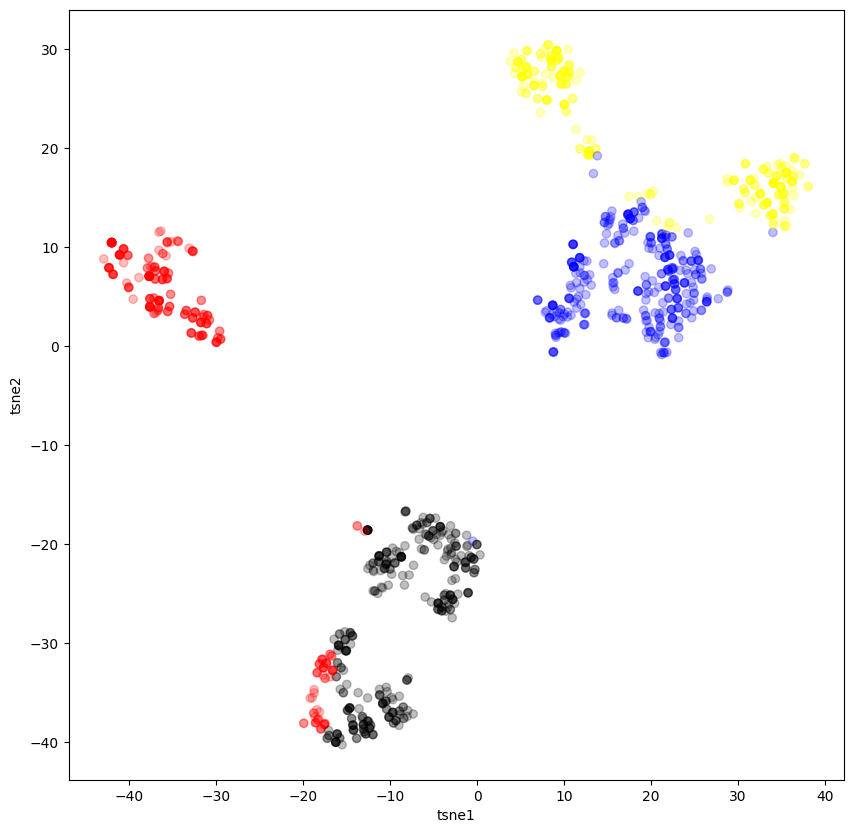

In [40]:
colors = ["red","green","blue","purple","yellow","cyan","black"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [41]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_pp_aut.csv')
Z2

array([[ 77.98880597,  30.67164179,  35.69402985,  64.72014925,
          5.29477612],
       [207.61290323,  65.64516129,  81.97947214, 149.42815249,
         38.68035191],
       [188.91696751,  41.28519856,  65.18050542,  72.45126354,
         14.75090253],
       [ 76.94318182,  47.30965909,  45.01136364, 129.77272727,
         34.75568182]])